In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('C:/Users/Administrator/Downloads/month.csv')

In [5]:
df.isnull().values.any()

True

In [6]:
indices=df[df.isnull().any(axis=1)].index

In [7]:
indices

Index([64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95],
      dtype='int64')

In [8]:
df=df.drop(indices,axis=0)

In [9]:
df.isnull().values.any()

False

In [10]:
df.shape

(64, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    64 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.6+ KB


In [12]:
df.rename(columns={'The_average_annual_payroll_of_the_region':'avg_payroll'},inplace=True)

In [13]:
df.describe()

,Revenue,Sales_quantity,Average_cost,avg_payroll
count,6.400000e+01,64.000000,64.000000,6.400000e+01
mean,3.236045e+07,19197.375000,1695.061159,2.869083e+07
std,1.164150e+07,6591.287257,296.844793,1.057191e+06
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.242655e+07,15065.500000,1499.142841,2.782857e+07
50%,3.209088e+07,18368.000000,1654.399798,2.819785e+07
75%,3.992999e+07,22856.250000,1916.401096,2.987852e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


In [14]:
df.duplicated().count

<bound method Series.count of 0     False
1     False
2     False
3     False
4     False
      ...  
59    False
60    False
61    False
62    False
63    False
Length: 64, dtype: bool>

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

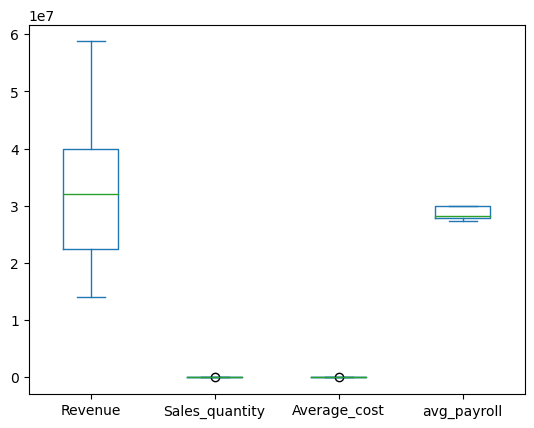

In [16]:
df[['Revenue','Sales_quantity','Average_cost','avg_payroll']].plot(kind='box')

In [22]:
df=df.sort_values(by='Period')
df['Period'] = pd.to_datetime(df['Period'], format='%d.%m.%Y')

In [23]:
tsa_df=df[['Period','Sales_quantity']]

In [24]:
tsa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Period          64 non-null     datetime64[ns]
 1   Sales_quantity  64 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 KB


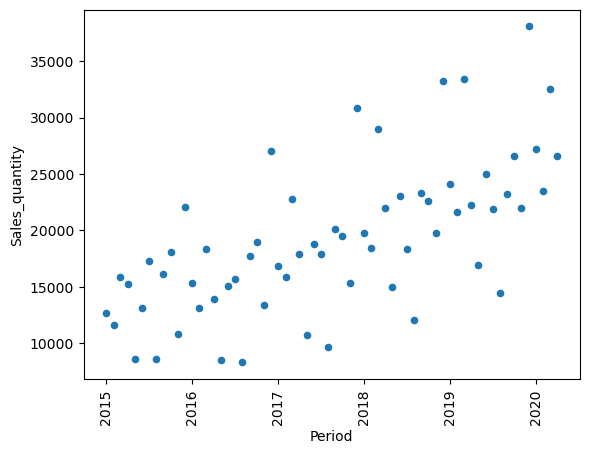

In [25]:
tsa_df.plot(kind='scatter', x='Period', y='Sales_quantity')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout
plt.show()

<Axes: >

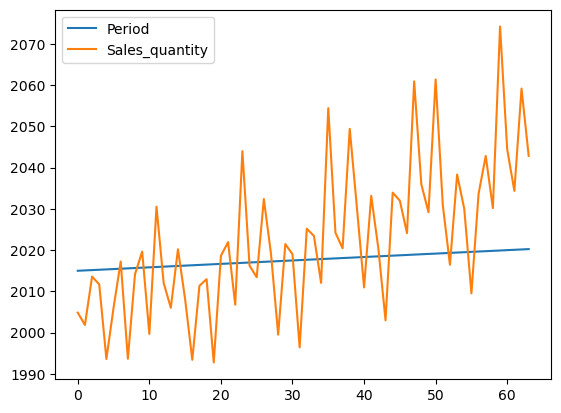

In [26]:
tsa_df.plot(kind='line')

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(tsa_df['Sales_quantity'],model='additive',period=12)

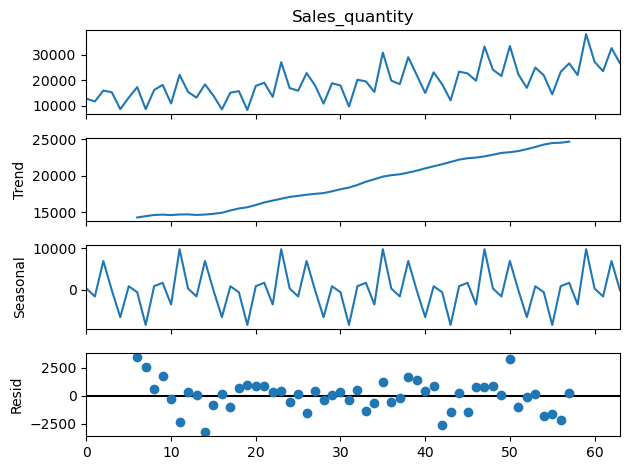

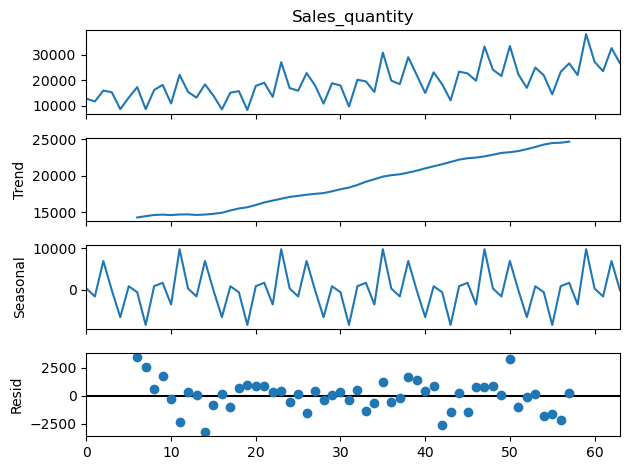

In [28]:
result.plot()

In [29]:
import matplotlib.pyplot as plt

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [31]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

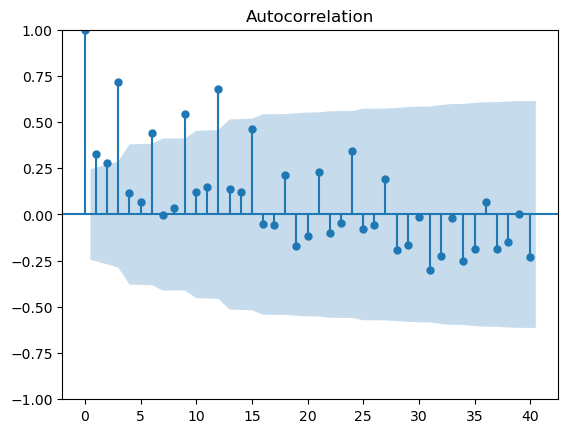

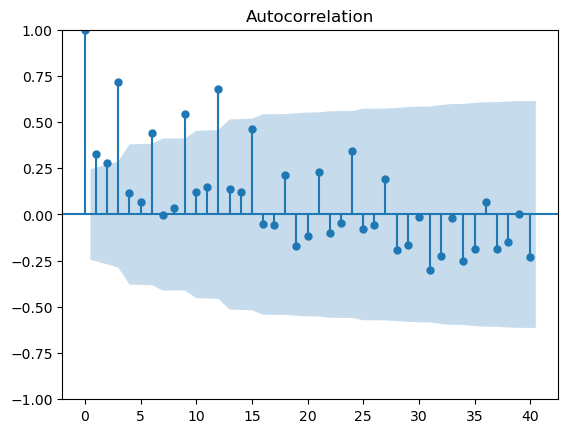

In [32]:
plot_acf(tsa_df['Sales_quantity'],lags=40)

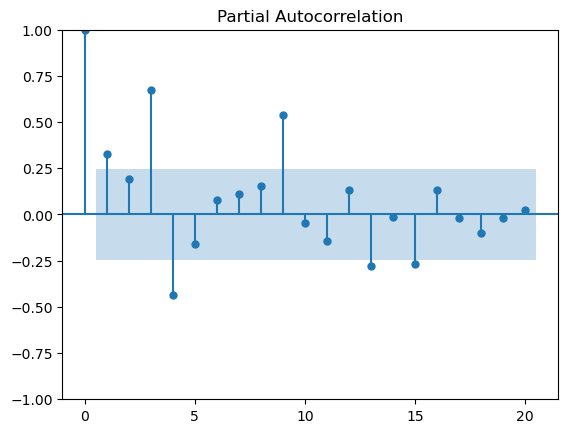

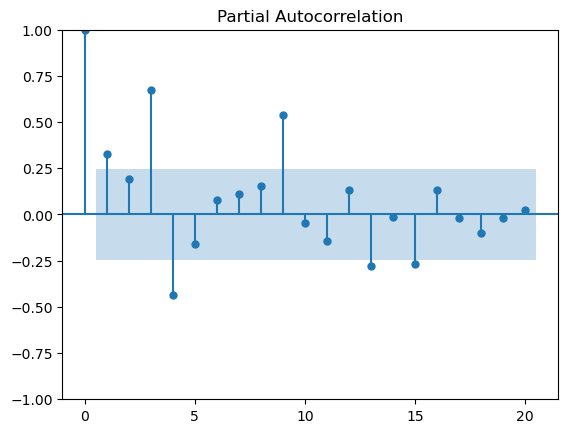

In [35]:
plot_pacf(tsa_df['Sales_quantity'],lags=20)

In [36]:
from statsmodels.tsa.arima.model import ARIMA

In [37]:
model=ARIMA(df['Sales_quantity'],order=(1,1,1))

In [38]:
model_fit=model.fit()

In [39]:
print(model_fit.summary)

<bound method SARIMAXResults.summary of <statsmodels.tsa.arima.model.ARIMAResults object at 0x000001C967046DD0>>


In [40]:
residuals=model_fit.resid

In [44]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

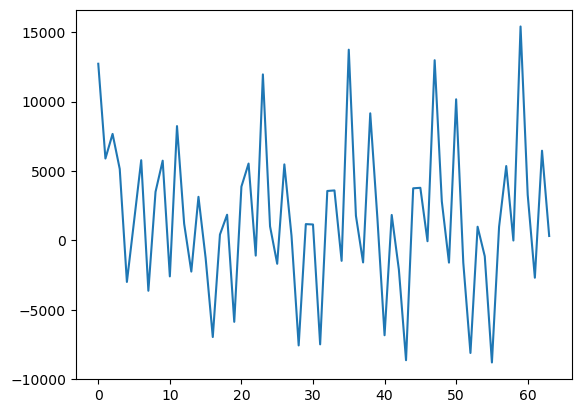

In [45]:
plt.plot(residuals)
plt.show()

<Figure size 1000x600 with 0 Axes>

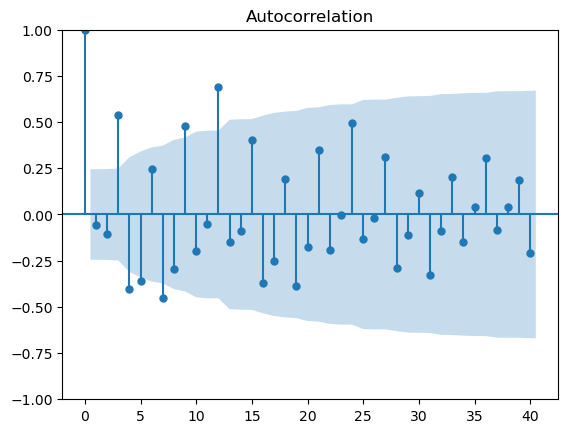

In [47]:
plt.figure(figsize=(10,6))
plot_acf(residuals,lags=40)
plt.show()
from sklearn.metrics import mean_squared_error

In [48]:
in_sample_predictions=model_fit.predict(start=0,end=len(tsa_df)-1,type='levels')
mse=mean_squared_error(tsa_df['Sales_quantity'],in_sample_predictions)
print(mse)

33252601.36890348
